In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
import glob

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise 



sns.set(style='white', context='notebook', palette='deep')

In [25]:
dataset = pd.read_csv('transaction_data/user-0.csv',encoding='latin-1', header=0)

In [26]:
dataset

,auth_id,Date,Vendor,Amount,Location
0,624,1/2/2013,Public Transportation - Train Pass,-23.89,CA
1,624,1/3/2013,Michael's Crafts,-23.22,CA
2,624,1/4/2013,Music Lessons - Piano,-17.40,CA
3,624,1/5/2013,Amazon Order - Paint Bushes,-21.16,CA
4,624,1/5/2013,Painting Course Fees,-65.86,CA
...,...,...,...,...,...
2323,624,12/28/2014,Art Auction,-12.77,CA
2324,624,12/28/2014,Art's Art Supplies,-7.23,CA
2325,624,12/29/2014,Whole Foods,-15.31,CA
2326,624,12/30/2014,Art Auction,-25.80,CA


In [27]:
# read and combine all the files togehter
path = r'transaction_data/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)


In [28]:
df.auth_id.nunique()

100

In [29]:
df.auth_id.shape

(224699,)

In [30]:
df.auth_id.value_counts(normalize=True)

15248    0.011010
81829    0.010659
57199    0.010636
8867     0.010605
31277    0.010601
           ...   
55836    0.009448
99842    0.009417
16910    0.009368
7338     0.009328
20128    0.009212
Name: auth_id, Length: 100, dtype: float64

In [31]:
df.columns = ['auth_id', 'Date', 'Vendor', 'Amount', 'Location']

In [32]:
df.Vendor.unique()

array(['Lyft', 'NFL Ticket - Chargers', "Dick's Sporting Goods",
       'Amazon Order - Athletic Equipment', 'Total Gym Fees',
       'Public Transportation - Train Pass', 'NBA Ticket - Lakers',
       "Sam's Sporting Apparel", 'Taxi', "Von's Groceries",
       'Restaurant - Burgers', 'GNC', 'Bike Rental', 'Uber',
       "Ralph's Grocery Store", 'Restaurant - Chinese',
       'Athletic Apparel', 'Starbucks Coffee', 'Vitamin Shoppe',
       'Restaurant - Pizza', 'Restaurant - Steakhouse', 'Whole Foods',
       'Public Transportation - Bus Pass', 'Food Delivery - GrubHub',
       'Paycheck', 'Housing Rent', 'Credit Card Payment',
       'Sprouts Market', 'Divorce Lawyer Fees', 'Comfort Inn',
       'Best Western Hotel', 'Kay Jewelry', 'Wedding Planner',
       'Southwest Flights - Cancun', 'Cancun Beach Resort',
       "Mark's Movers", 'FedEx Shipping', "Jerome's Furniture",
       'Home Depot', 'Refrigerator Depot', 'Hamilton Move & Storage',
       'Water & Sewer - Late Payment Penalty

In [33]:
df.Location.unique()

array(['CA'], dtype=object)

In [34]:
commuter = ['']
pet_lover = ['']
art_lover = ['']
music_lover = ['']
sports_lover = ['']
gurmet = ['']
drinker = ['']
marrige_status = ['']
financial_status = ['']


In [35]:
sports_lover = ['NFL Ticket - Chargers',"Dick's Sporting Goods",'Amazon Order - Athletic Equipment','Total Gym Fees','NBA Ticket - Lakers',"Sam's Sporting Apparel",'Athletic Apparel']

In [36]:
df['sports'] = df.Vendor.map(lambda x: 1 if x in sports_lover else 0)

In [37]:
df['sport_spending'] = df.Amount*df.sports
df

,auth_id,Date,Vendor,Amount,Location,sports,sport_spending
0,22696,1/2/2013,Lyft,-34.64,CA,0,-0.00
1,22696,1/2/2013,NFL Ticket - Chargers,-95.52,CA,1,-95.52
2,22696,1/3/2013,Dick's Sporting Goods,-13.92,CA,1,-13.92
3,22696,1/3/2013,NFL Ticket - Chargers,-31.03,CA,1,-31.03
4,22696,1/3/2013,Amazon Order - Athletic Equipment,-38.95,CA,1,-38.95
...,...,...,...,...,...,...,...
224694,19370,12/30/2014,On Demand TV,-15.58,CA,0,-0.00
224695,19370,12/30/2014,On Demand Movie,-6.49,CA,0,-0.00
224696,19370,12/30/2014,Food Delivery - GrubHub,-27.46,CA,0,-0.00
224697,19370,12/32/2014,Restaurant - Burgers,-19.02,CA,0,-0.00


In [38]:
money = df.groupby('auth_id').sport_spending.sum()

In [39]:
value = df.groupby('auth_id').Amount.sum()
total_spending = list(value)
total_spending

[-45378.37000000004,
 -63755.98000000004,
 -55591.02000000002,
 -65691.49000000009,
 -83361.16000000016,
 -64260.78999999989,
 -73365.01999999993,
 -7802.540000000002,
 -41041.44000000013,
 -25956.64999999998,
 -32339.969999999987,
 -50393.04000000002,
 -77414.82,
 -22407.830000000045,
 -37471.09999999997,
 -77948.97999999995,
 -693.5800000000003,
 -93062.94000000005,
 -38392.9,
 -79197.39999999997,
 -52509.3899999999,
 -57260.54999999997,
 -61505.78999999992,
 -485.16000000000514,
 -55095.30999999996,
 -39795.729999999974,
 -48834.78999999992,
 -37956.909999999996,
 -97098.66000000024,
 -74086.50000000003,
 -58692.570000000065,
 -50874.339999999946,
 -44199.63000000007,
 -60953.719999999936,
 -33352.85999999999,
 -58887.19000000006,
 -47241.120000000075,
 -22732.649999999958,
 -37897.700000000026,
 -10532.579999999985,
 -16013.990000000018,
 -47946.95000000002,
 -10889.459999999994,
 -74079.3900000001,
 -24935.790000000048,
 -33574.71,
 -73113.34999999995,
 -19615.709999999974,
 -5187

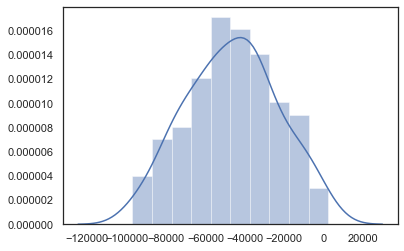

In [40]:
sns.distplot(total_spending, bins=10) # monthly spending follows normal distribution

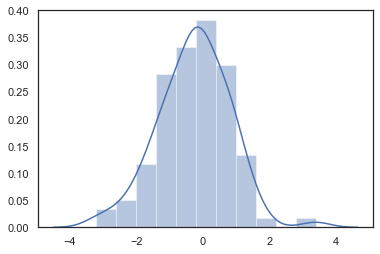

In [41]:
x = np.random.normal(size=100)
sns.distplot(x);

In [42]:
new_df = money.to_frame()
new_df

,sport_spending
auth_id,
624,0.0
1882,0.0
2805,0.0
3015,0.0
3028,-29593.9
...,...
98104,-26839.7
98316,0.0
99128,0.0


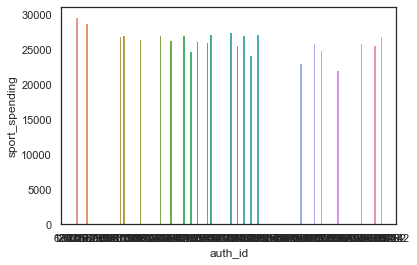

In [43]:
sns.barplot(x =new_df.index, y= -new_df.sport_spending)

In [44]:
df.Vendor.unique()

array(['Lyft', 'NFL Ticket - Chargers', "Dick's Sporting Goods",
       'Amazon Order - Athletic Equipment', 'Total Gym Fees',
       'Public Transportation - Train Pass', 'NBA Ticket - Lakers',
       "Sam's Sporting Apparel", 'Taxi', "Von's Groceries",
       'Restaurant - Burgers', 'GNC', 'Bike Rental', 'Uber',
       "Ralph's Grocery Store", 'Restaurant - Chinese',
       'Athletic Apparel', 'Starbucks Coffee', 'Vitamin Shoppe',
       'Restaurant - Pizza', 'Restaurant - Steakhouse', 'Whole Foods',
       'Public Transportation - Bus Pass', 'Food Delivery - GrubHub',
       'Paycheck', 'Housing Rent', 'Credit Card Payment',
       'Sprouts Market', 'Divorce Lawyer Fees', 'Comfort Inn',
       'Best Western Hotel', 'Kay Jewelry', 'Wedding Planner',
       'Southwest Flights - Cancun', 'Cancun Beach Resort',
       "Mark's Movers", 'FedEx Shipping', "Jerome's Furniture",
       'Home Depot', 'Refrigerator Depot', 'Hamilton Move & Storage',
       'Water & Sewer - Late Payment Penalty

In [45]:
marriage = {'Divorce Lawyer Fees': 'divorced', 
            'Amazon Order - Baby Crib': 'has_kids', 
            'Hospital - Prenatal Care':'has_kids',
            'Babies "R" Us':'has_kids', 
            'Amazon Order - Baby Crib':'has_kids'}

In [46]:
marriage_status = df.Vendor.map(marriage)

In [47]:
marriage_status.fillna('unknown', inplace=True)


In [48]:
df['marriage_status'] = marriage_status

In [49]:
x = df.groupby('auth_id').marriage_status.unique()
x

auth_id
624                [unknown, has_kids]
1882     [unknown, divorced, has_kids]
2805               [unknown, has_kids]
3015                         [unknown]
3028     [unknown, divorced, has_kids]
                     ...              
98104    [unknown, divorced, has_kids]
98316    [unknown, divorced, has_kids]
99128              [unknown, has_kids]
99292    [unknown, divorced, has_kids]
99842              [unknown, has_kids]
Name: marriage_status, Length: 100, dtype: object

In [50]:
s = df.groupby('auth_id').get_group(624)


In [51]:
df.columns

Index(['auth_id', 'Date', 'Vendor', 'Amount', 'Location', 'sports',
       'sport_spending', 'marriage_status'],
      dtype='object')

In [52]:
x.loc[624]

array(['unknown', 'has_kids'], dtype=object)

In [53]:
x.index

Int64Index([  624,  1882,  2805,  3015,  3028,  3056,  3122,  4567,  5349,
             6896,  7299,  7305,  7338,  8867,  9340,  9367, 10115, 12013,
            13015, 13799, 15241, 15248, 16060, 16910, 18908, 19209, 19370,
            20128, 20458, 22696, 23752, 24694, 28143, 28328, 28337, 28816,
            31277, 32320, 34096, 34686, 35187, 35277, 37458, 37551, 37948,
            39379, 40087, 41101, 42018, 42059, 42061, 43085, 43305, 43634,
            44119, 44675, 44986, 46816, 50068, 50846, 51974, 52299, 52374,
            52889, 53897, 54144, 54454, 55836, 56930, 57199, 57556, 61519,
            63891, 66483, 67812, 68995, 72019, 72851, 73275, 75258, 76016,
            77168, 78908, 81829, 83049, 85770, 88199, 89593, 91528, 93372,
            93777, 94501, 94765, 94976, 96265, 98104, 98316, 99128, 99292,
            99842],
           dtype='int64', name='auth_id')

In [54]:
is_divorced = [] # divorced 
has_kids = [] # 83 people has kids or will be having kids
for ind in x.index:
    if 'divorced' in x.loc[ind]:
        is_divorced.append(1)
    else:
        is_divorced.append(0)
    if 'has_kids' in x.loc[ind]:
        has_kids.append(1)
    else:
        has_kids.append(0)

In [55]:
temp_df = pd.DataFrame(is_divorced, index = x.index, columns =['is_divorced'])

In [56]:
temp_df

,is_divorced
auth_id,
624,0
1882,1
2805,0
3015,0
3028,1
...,...
98104,1
98316,1
99128,0


In [57]:
new_df

,sport_spending
auth_id,
624,0.0
1882,0.0
2805,0.0
3015,0.0
3028,-29593.9
...,...
98104,-26839.7
98316,0.0
99128,0.0


In [58]:
new_df = new_df.merge(temp_df, left_index=True, right_index=True)

In [59]:
new_df

,sport_spending,is_divorced
auth_id,,
624,0.0,0
1882,0.0,1
2805,0.0,0
3015,0.0,0
3028,-29593.9,1
...,...,...
98104,-26839.7,1
98316,0.0,1
99128,0.0,0


In [60]:
temp_df = pd.DataFrame(has_kids, index = x.index, columns =['has_kids'])

In [61]:
temp_df.has_kids.value_counts()

1    83
0    17
Name: has_kids, dtype: int64

In [62]:
new_df = new_df.merge(temp_df, left_index=True, right_index=True)

In [63]:
new_df

,sport_spending,is_divorced,has_kids
auth_id,,,
624,0.0,0,1
1882,0.0,1,1
2805,0.0,0,1
3015,0.0,0,0
3028,-29593.9,1,1
...,...,...,...
98104,-26839.7,1,1
98316,0.0,1,1
99128,0.0,0,1


In [64]:
df.Vendor.unique()

array(['Lyft', 'NFL Ticket - Chargers', "Dick's Sporting Goods",
       'Amazon Order - Athletic Equipment', 'Total Gym Fees',
       'Public Transportation - Train Pass', 'NBA Ticket - Lakers',
       "Sam's Sporting Apparel", 'Taxi', "Von's Groceries",
       'Restaurant - Burgers', 'GNC', 'Bike Rental', 'Uber',
       "Ralph's Grocery Store", 'Restaurant - Chinese',
       'Athletic Apparel', 'Starbucks Coffee', 'Vitamin Shoppe',
       'Restaurant - Pizza', 'Restaurant - Steakhouse', 'Whole Foods',
       'Public Transportation - Bus Pass', 'Food Delivery - GrubHub',
       'Paycheck', 'Housing Rent', 'Credit Card Payment',
       'Sprouts Market', 'Divorce Lawyer Fees', 'Comfort Inn',
       'Best Western Hotel', 'Kay Jewelry', 'Wedding Planner',
       'Southwest Flights - Cancun', 'Cancun Beach Resort',
       "Mark's Movers", 'FedEx Shipping', "Jerome's Furniture",
       'Home Depot', 'Refrigerator Depot', 'Hamilton Move & Storage',
       'Water & Sewer - Late Payment Penalty

In [65]:
hobby = {'Karaoke Bar':1,
         'Concert Ticket':1, 
         'Guitar Center':1,
         'Music Lessons - Piano':1,
         'Painting Course Fees':2,
         'Amazon Order - Paint Canvas':2,
         'Amazon Order - Paint Bushes':2,
         "Art's Art Supplies": 3,
         'Art Auction': 3,
         'Art Museum':3,
         'San Diego Museum':3,
         "Michael's Crafts": 3,
         'NFL Ticket - Chargers':4,
         "Dick's Sporting Goods":4,
         'Amazon Order - Athletic Equipment':4, 
         'Total Gym Fees': 4,
         'NBA Ticket - Lakers':4,
         'Athletic Apparel':4,
         'Amazon Order - Mathematics Book':5, 
         'Science Museum':5,
         'Library Membership':5, 
         'Amazon Order - Science Book':5,
         "Mary's Book Store":5, 
         'Goods2 - ThinkGeek':5,
         'Amazon Order - Biology Book':5,
         'Online Education Courses':5,
         'On Demand Movie':6, 
         'Red Box DVD Rental':6,
         'Movie Ticket':6,
         'Pet Smart':7,
         'Pet Supply - Cat Food':7,  
    }

In [66]:
hobby = df.Vendor.map(hobby)

In [67]:
hobby.unique()

array([nan,  4.,  5.,  3.,  7.,  6.,  1.,  2.])

In [68]:
df['hobby'] = hobby

In [69]:
x = df.groupby('auth_id').hobby.unique()
x

auth_id
624      [nan, 3.0, 1.0, 2.0]
1882          [nan, 1.0, 6.0]
2805     [nan, 2.0, 1.0, 3.0]
3015     [1.0, 3.0, nan, 2.0]
3028               [nan, 4.0]
                 ...         
98104              [nan, 4.0]
98316         [nan, 1.0, 6.0]
99128         [nan, 7.0, 6.0]
99292         [nan, 1.0, 6.0]
99842    [1.0, 2.0, nan, 3.0]
Name: hobby, Length: 100, dtype: object

In [70]:
1 in x.loc[624]

True

In [71]:
love_music = [] #1
love_painting=[] #2
love_art = [] #3
love_sports = [] #4
love_reading = [] #5
love_movie = [] #6
has_pet = [] #7

for ind in x.index:
    if 1 in x.loc[ind]:
        love_music.append(1)
    else:
        love_music.append(0)
    if 2 in x.loc[ind]:
        love_painting.append(1)
    else:
        love_painting.append(0) 
    if 3 in x.loc[ind]:
        love_art.append(1)
    else:
        love_art.append(0) 
    if 4 in x.loc[ind]:
        love_sports.append(1)
    else:
        love_sports.append(0)
    if 5 in x.loc[ind]:
        love_reading.append(1)
    else:
        love_reading.append(0)
        
    if 6 in x.loc[ind]:
        love_movie.append(1)
    else:
        love_movie.append(0)
            
    if 7 in x.loc[ind]:
        has_pet.append(1)
    else:
        has_pet.append(0)

In [72]:
dic = {'love_music': love_music, 'love_painting' :love_painting, 'love_art':love_art, 
       'love_sports':love_sports, 'love_reading':love_reading, 'love_movie':love_movie, 'has_pet':has_pet}

In [73]:
temp_df = pd.DataFrame(dic, index =x.index)

In [74]:
temp_df

,love_music,love_painting,love_art,love_sports,love_reading,love_movie,has_pet
auth_id,,,,,,,
624,1,1,1,0,0,0,0
1882,1,0,0,0,0,1,0
2805,1,1,1,0,0,0,0
3015,1,1,1,0,0,0,0
3028,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
98104,0,0,0,1,0,0,0
98316,1,0,0,0,0,1,0
99128,0,0,0,0,0,1,1


In [75]:
new_df = new_df.merge(temp_df, left_index=True, right_index=True)

In [76]:
p1 = new_df.iloc[19].values[1:]
p2 = new_df.iloc[88].values[1:]

In [77]:
pairwise.cosine_similarity([p1], [p2], dense_output=True)

array([[0.81649658]])

In [78]:
df.groupby('auth_id').Amount.sum()

auth_id
624     -45378.37
1882    -63755.98
2805    -55591.02
3015    -65691.49
3028    -83361.16
           ...   
98104   -57175.70
98316   -68236.79
99128   -37728.93
99292   -42408.64
99842   -36480.66
Name: Amount, Length: 100, dtype: float64

In [79]:
df

,auth_id,Date,Vendor,Amount,Location,sports,sport_spending,marriage_status,hobby
0,22696,1/2/2013,Lyft,-34.64,CA,0,-0.00,unknown,NaN
1,22696,1/2/2013,NFL Ticket - Chargers,-95.52,CA,1,-95.52,unknown,4.0
2,22696,1/3/2013,Dick's Sporting Goods,-13.92,CA,1,-13.92,unknown,4.0
3,22696,1/3/2013,NFL Ticket - Chargers,-31.03,CA,1,-31.03,unknown,4.0
4,22696,1/3/2013,Amazon Order - Athletic Equipment,-38.95,CA,1,-38.95,unknown,4.0
...,...,...,...,...,...,...,...,...,...
224694,19370,12/30/2014,On Demand TV,-15.58,CA,0,-0.00,unknown,NaN
224695,19370,12/30/2014,On Demand Movie,-6.49,CA,0,-0.00,unknown,6.0
224696,19370,12/30/2014,Food Delivery - GrubHub,-27.46,CA,0,-0.00,unknown,NaN
224697,19370,12/32/2014,Restaurant - Burgers,-19.02,CA,0,-0.00,unknown,NaN


In [80]:
auth_ids = df.auth_id.unique()
auth_ids
df_person = df[df.auth_id==auth_ids[19]]
pay_df = df_person[df_person.Vendor=='Paycheck']
pay_df.Amount.mean()
# pay_df['Date'] = pd.to_datetime(pay_df['Date']) 
# pay_df['Date'].diff()

1850.0

In [81]:
ll = df_person[df_person.Vendor=='Payheck']
ll.empty

True

In [82]:
auth_ids = df.auth_id.unique()
income = []
for i in range(100):
    df_person = df[df.auth_id==auth_ids[i]]
    pay_df = df_person[df_person.Vendor=='Paycheck']
    if pay_df.empty:
        income.append(0)
    else:
        income.append(pay_df.Amount.mean())    
income   
    

[3565.5,
 3774.0,
 4254.066666666667,
 2873.0,
 2627.0,
 2879.0,
 2962.0,
 2134.2,
 3110.0,
 2980.25,
 3169.0,
 1936.0666666666666,
 3106.4285714285716,
 2776.0,
 3972.0,
 2921.0,
 2525.0,
 3806.0,
 2613.3333333333335,
 1850.0,
 2915.0,
 4513.0,
 4106.0,
 3535.0,
 2650.8,
 3564.0,
 2977.0,
 4190.5,
 2289.0,
 3711.0,
 2282.0,
 2344.0,
 4361.0,
 3212.9411764705883,
 2610.0,
 4581.0,
 2736.8,
 2779.0,
 2831.0,
 3979.0,
 2592.0,
 4136.0,
 3051.0,
 3637.0,
 2934.0,
 4374.0,
 3185.0,
 2510.0,
 3506.0,
 2007.0,
 4219.0,
 2867.0,
 3198.0,
 4375.0,
 4112.0,
 2146.0,
 2665.0,
 3120.0,
 4609.0,
 4325.6,
 2386.0,
 3546.0,
 3246.25,
 3630.090909090909,
 3984.75,
 3639.0,
 2213.0,
 2642.5882352941176,
 2771.0,
 1928.3076923076924,
 4713.0,
 3667.0,
 4573.0,
 4771.0,
 2197.125,
 4261.0,
 1941.0,
 2974.0,
 3988.0,
 4202.0,
 4795.0,
 4505.0,
 0,
 3423.3,
 4554.923076923077,
 3872.0,
 2195.375,
 2188.0,
 3474.909090909091,
 3202.090909090909,
 4496.0,
 3122.0,
 3070.0,
 4280.0,
 3802.0,
 4010.125,
 2818

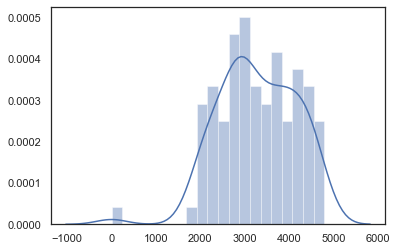

In [83]:
sns.distplot(income, bins=20) # the income analysis for people 

In [84]:
temp_df = pd.DataFrame(income, index = auth_ids, columns=['income'])

In [85]:
new_df.merge(temp_df, left_index=True, right_index=True)

,sport_spending,is_divorced,has_kids,love_music,love_painting,love_art,love_sports,love_reading,love_movie,has_pet,income
624,0.0,0,1,1,1,1,0,0,0,0,2525.000000
1882,0.0,1,1,1,0,0,0,0,1,0,3802.000000
2805,0.0,0,1,1,1,1,0,0,0,0,2736.800000
3015,0.0,0,0,1,1,1,0,0,0,0,4202.000000
3028,-29593.9,1,1,0,0,0,1,0,0,0,3984.750000
...,...,...,...,...,...,...,...,...,...,...,...
98104,-26839.7,1,1,0,0,0,1,0,0,0,1941.000000
98316,0.0,1,1,1,0,0,0,0,1,0,1928.307692
99128,0.0,0,1,0,0,0,0,0,1,1,2779.000000
99292,0.0,1,1,1,0,0,0,0,1,0,3637.000000


In [88]:
df.sort_values(by= 'Amount')

,auth_id,Date,Vendor,Amount,Location,sports,sport_spending,marriage_status,hobby
205154,94765,7/2/2013,Housing Rent,-1399.0,CA,0,-0.0,unknown,NaN
220410,35277,4/2/2013,Housing Rent,-1399.0,CA,0,-0.0,unknown,NaN
121647,44986,4/2/2013,Housing Rent,-1398.0,CA,0,-0.0,unknown,NaN
1852,22696,10/2/2014,Housing Rent,-1398.0,CA,0,-0.0,unknown,NaN
5551,6896,12/2/2013,Housing Rent,-1397.0,CA,0,-0.0,unknown,NaN
...,...,...,...,...,...,...,...,...,...
180417,68995,8/2/2013,Paycheck,4795.0,CA,0,0.0,unknown,NaN
179855,68995,3/2/2013,Paycheck,4795.0,CA,0,0.0,unknown,NaN
180178,68995,6/2/2013,Paycheck,4795.0,CA,0,0.0,unknown,NaN
180537,68995,9/2/2013,Paycheck,4795.0,CA,0,0.0,unknown,NaN


In [89]:
df.sort_index(axis=1, ascending= False)

,sports,sport_spending,marriage_status,hobby,auth_id,Vendor,Location,Date,Amount
0,0,-0.00,unknown,NaN,22696,Lyft,CA,1/2/2013,-34.64
1,1,-95.52,unknown,4.0,22696,NFL Ticket - Chargers,CA,1/2/2013,-95.52
2,1,-13.92,unknown,4.0,22696,Dick's Sporting Goods,CA,1/3/2013,-13.92
3,1,-31.03,unknown,4.0,22696,NFL Ticket - Chargers,CA,1/3/2013,-31.03
4,1,-38.95,unknown,4.0,22696,Amazon Order - Athletic Equipment,CA,1/3/2013,-38.95
...,...,...,...,...,...,...,...,...,...
224694,0,-0.00,unknown,NaN,19370,On Demand TV,CA,12/30/2014,-15.58
224695,0,-0.00,unknown,6.0,19370,On Demand Movie,CA,12/30/2014,-6.49
224696,0,-0.00,unknown,NaN,19370,Food Delivery - GrubHub,CA,12/30/2014,-27.46
224697,0,-0.00,unknown,NaN,19370,Restaurant - Burgers,CA,12/32/2014,-19.02


In [102]:
df.iloc[:3][['Date','Amount']]

,Date,Amount
0,1/2/2013,-34.64
1,1/2/2013,-95.52
2,1/3/2013,-13.92
